In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Viz

/content/drive/MyDrive/Viz


# Project


In [5]:
import pandas as pd

In [ ]:
full_df = pd.read_csv("AgeDataset-V1.csv")
full_df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [ ]:
df = full_df.copy()

# Preprocessing

In [ ]:
df = df[df['Gender'].isin(['Male', 'Female'])]

In [ ]:
som = ["Mongolia", "Oman", "Qatar", "Somalia", "Somaliland", "Greenland"]
df.loc[df['Country'].str.contains('Somaliland', na=False), 'Country'] = 'Somaliland'
df.loc[df['Country'].isin(som) & df['Manner of death'].isna(), 'Manner of death'] = 'Unknown'

In [ ]:
df.loc[df['Id'] == 'Q1194003', 'Occupation'] = 'Politics'
df.loc[df['Id'] == 'Q4666119', 'Occupation'] = 'Politics'
df.loc[df['Id'] == 'Q4724992', 'Occupation'] = 'Social'
df.loc[df['Id'] == 'Q5949856', 'Occupation'] = "Researcher"
df.loc[df['Id'] == 'Q6893454', 'Occupation'] = 'Politics'
df.loc[df['Id'] == 'Q12337952', 'Occupation'] = 'Art'
df.loc[df['Id'] == 'Q50941631', 'Occupation'] = 'Social'
df.loc[df['Id'] == 'Q62081202', 'Occupation'] = 'Social'

In [ ]:
df[df['Country'] == 'Somaliland']

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
70933,Q470991,Muhammad Haji Ibrahim Egal,President of Somaliland (1928-2002),Male,Somaliland,Politician,1928,2002.0,Unknown,74.0


### Categories

Art: This would include occupations like Artist, Author, Musician, Filmmaker, Dancer, Painter, Sculptor, Playwright, Novelist, Poet, Photographer, and other creative professions.

Politics: This category can encompass Politician, Diplomat, Judge, Military Personnel, Religious Figure, Activist, Statesperson, Civil Servant, Government Official, Political Advisor, etc.

Sports: This would include Athlete, Coach, Trainer, Sports Official, and specific sports roles like Footballer, Swimmer, Gymnast, Racer, etc.

Science: This category would cover Researcher, Engineer, Scientist, Educator, Physician, Surgeon, Psychologist, Psychiatrist, Biologist, Chemist, Astronomer, Physicist, and other science-related professions.

Business: This would include Businessperson, Entrepreneur, Lawyer, Economist, Banker, Marketing Professional, Salesperson, Business Executive, Manager, and other roles related to commerce and trade.

Social: This category could include Social Worker, Healthcare Worker, Nurse, Counselor, Community Organizer, Human Rights Activist, Environmentalist, Charity Worker, and other professions focusing on social services, community work, and welfare.

In [ ]:
df = df[df['Occupation'].notna()]
df['Occupation'] = df['Occupation'].apply(lambda x: str(x).split('; ')[0].capitalize().strip())
df = df[df['Occupation'].isin(df['Occupation'].value_counts()[df['Occupation'].value_counts() > 5].index)]

In [ ]:
occupation_categories = {
    'Art': [
        'Pianist', 'Explorer', "Art model",
        'Architect', 'Journalist', 'Philosopher', 'Translator', 'Publisher', 'Conductor', 'Archivist', 'Organist', 'Radio personality', 'Gardener', 'Disc jockey', 'Announcer', 'Diarist', 'Television director', 'Potter', 'Theatrical producer', 'Interior designer', 'Music critic', 'Concertmaster', 'Penciller','Trumpeter', 'Furniture designer', 'Typographer',

        'Philatelist', 'Ceramist', 'Calligrapher',

        'Magician', 'Printmaker', 'Printer', 'Circus performer', 'Bookseller', 'Critic', 'Autobiographer', 'Orientalist', 'Impresario', 'Mangaka', 'Puppeteer',

        'Artist', 'Author', 'Musician', 'Filmmaker', 'Dancer', 'Painter',
        'Sculptor', 'Playwright', 'Novelist', 'Poet', 'Photographer',
        "Cinematographer", "Film producer", "Ballet dancer", "Graphic designer",
        "Theater director", "Art collector", "Television presenter", "Guitarist",
        "Engraver","Camera operator", "Film critic", "Dressmaker", "Intellectual"

        'Designer','Curator', 'Fashion designer', 'Choreographer', 'Biographer', 'Costume designer', 'Model', 'Comedian', 'Violinist', 'Lyricist', 'Musical instrument maker',

        'Organ builder', 'Goldsmith', 'Scenographer', 'Watchmaker', 'Medallist',
        'Musicologist', 'Cartographer', 'Animator', 'Art director', 'Record producer',
        'Music pedagogue', 'Art critic', 'Production designer', 'Luthier', 'Dramaturge',
        'Literary critic', 'Flautist', 'Caricaturist', 'Oboist', 'Seiyū', 'Karateka', 'Aikidoka'
    ],
    'Politics': [
        'Aristocrat', 'Consort', 'Rector', "Public figure", "Terrorist", "Hero", "Terrorism", "Columnist", "Dissident", 'Politician',
        'Jurist', 'Minister', 'Pastor', 'Rabbi', 'Trade unionist', 'Police officer', 'Civil servant', 'Naval officer', 'Official', 'Assessor', 'Chaplain', 'Legal scholar', 'Vicar general', 'Ship captain', 'Count', 'Courtier', 'Lexicographer',

        'Officer of the french navy', 'Political activist', 'Knight', 'Political commissar', 'First lady',

        'Criminal', 'Contributing editor', 'Newspaper editor', 'Governor', 'Justice of the peace', 'Suffragist',

        'Politician', 'Diplomat', 'Judge', 'Military Personnel', 'Religious Figure',
        'Activist', 'Statesperson', 'Civil Servant', 'Government Official',
        'Sheriff', 'Civil rights advocate', 'French resistance fighter',
        "Political Advisor", "Monarch", "Revolutionary", "Presbyter", "Samurai",
        "Parson", "Sovereign", "Ruler", "Editor", "Suffragette", "Partisan", "Intelligence officer",
        "Preacher", "Socialite", "Magistrate", "Luger",

        'Military personnel', 'Religious figure', 'Prelate', 'Spy', 'Christians jehovah’s witnesses', 'Cleric', 'Feudatory', 'Barrister', 'Television producer', 'Chamberlain', 'General officer',

        'Condottiero', 'Geheimrat', 'Canon', 'Colonial administrator', 'Regent', 'Mayor',
    ],
    'Sports': [
        'Sailor', 'Flying ace',  "Professional wrestler",  'Fencer', "Kayaker", "Pole vaulter", "Rally driver", "Show jumper",
        'Rower', 'Amateur wrestler', 'Motorcycle racer', 'Archer', 'Curler', 'Dressage rider', 'Bandleader', 'Carpenter', 'Kapellmeister',
        'Coxswain', 'Equestrian', 'Wrestler', 'Formula one driver', 'Event rider', 'Hammer thrower', 'Go professional',
        "Matador", "Combatant", "Triple jumper", "Bodybuilder", "Fighter",
        'Judoka', 'Middle-distance runner', 'Bullfighter', 'Fiddler', 'Mountain guide', 'Nordic combined skier', 'Stunt performer', 'Discus thrower', 'Javelin thrower', 'Navigator',

        'Athlete', 'Coach', 'Trainer', 'Sports Official', 'Racewalker', 'Hurdler', 'Long jumper', 'Bowler', 'Marineoffizier',
        'Footballer', 'Swimmer', 'Gymnast', 'Racer',

        "Athlete", "Coach", "Trainer", "Sports Official", "Footballer",
        "Swimmer", "Gymnast", "Racer", "Canoeist", "Hurler", "Jockey",
        "Racing driver", "Alpine skier", "High jumper",

        'Sprinter', 'Mountaineer', 'Racing automobile driver', 'Cross-country skier', 'Bobsledder', 'Long-distance runner', 'Weightlifter', 'Skipper', 'Drummer',

        'Marathon runner', 'Fighter pilot', 'Competitive diver'
    ],
    'Science': [
        'Airman', "Volcanologist",
        'Inventor', 'Geographer', 'Academic', 'Nun', 'Agronomist', 'Philologist', 'Bassist', 'Astrologer', 'Biblical scholar', 'Mechanic', 'Clarinetist',

        'Lepidopterist', 'Pharmacologist', 'Mycologist', 'Epidemiologist', 'Mineralogist', 'Nutritionist',

        'Paleontologist', 'Physiologist', 'Ophthalmologist', 'Bacteriologist', 'Anatomist', 'Cellist', 'Dermatologist',

        'Researcher', 'Engineer', 'Scientist', 'Educator', 'Physician',
        'Psychologist', 'Psychiatrist', 'Biologist', 'Chemist', 'Astronomer',
        'Physicist',
        'Egyptologist', 'Ethnologist',  'Conservationist',
        "Pharmacist", "Veterinarian", "Ornithologist",

        'Anthropologist', 'Meteorologist', 'Naturalist', 'Statistician', 'Numismatist', 'Antiquarian', 'Classical scholar',

        'Geneticist', 'Microbiologist', 'Pathologist', 'Neurologist', 'Sociologist'
    ],
    'Business': [
        'Merchant', 'Gangster',  'Art dealer',   'Director',
        'Chief executive officer', 'Hotel manager', 'Business theorist',

        'Master builder', 'Financier', 'Industrialist', 'Secretary', 'Stockbroker', 'Accountant',

        'Businessperson', 'Entrepreneur', 'Lawyer', 'Economist', 'Banker',
        'Marketing Professional', 'Salesperson', 'Business Executive', 'Manager',
        'Business magnate', 'Talent agent', 'Hispanist', 'Balloonist',
        'Business executive',

        'Shipowner', 'Restaurateur', 'Privateer', 'Horticulturist', 'Silversmith', "Percussionist", "Muezzin", "Beauty pageant contestant", "Drug lord",

    ],
    'Social': [
        'Teacher', 'Farmer', 'Lecturer', 'Rancher',  'Monk', 'Cook', 'Baker',  'Surgeon', "Dentist", 'Lady-in-waiting',
        'Student', 'Clergyman', 'Drug trafficker', 'Cabinetmaker',
        'Brother', 'Folklorist', 'Firefighter', 'Warrior', 'Prostitute', 'Religious leader', 'General practitioner', 'Ironmaster', 'Mason', 'Esperantist', 'Blacksmith', 'Chronicler', 'Hairdresser', 'Radio producer',
        'Ecologist', 'Urban planner',
        'Vicar', 'Docent', 'Deacon', 'Miner', 'Salonnière', 'Solicitor', 'Joiner', 'Environmentalist', 'Provost', 'Gynaecologist', 'Executioner', 'Curate', 'Winegrower', 'Notary', 'Referee', 'Manual worker', 'Schoolmaster', 'Tribal chief', 'Peace activist', 'Submariner', 'Officer of the French navy', 'Tailor', 'Forester', 'Artisan', 'Cardiologist', 'Cowboy', 'Genealogist', 'Tribal chief',
        'Paratrooper', 'Domestic worker', 'Clown', 'Fisher',
        'Social Worker', 'Healthcare Worker', 'Nurse', 'Counselor', "Psychoanalyst",
        'Community Organizer', 'Human Rights Activist', 'Environmental Activist',
        'Charity Worker', 'Librarian',  'Serial killer', 'Chef', 'Test pilot',  'Feminist', 'Saxophonist', 'Beekeeper',
        "Milkmaid", "Choir director",
        "Environmentalista", "Muhaddith", "Imam", "Ulama", "Faqih", "Qāriʾ", "Mystic", "Classical guitarist", "Qadi", "Pasha",
        "Islamicist", "Shah", "Mufti", "Literary", "Prophet", "Ayatollah", "Vizier",
        "Skald", "Religious studies scholar", "Saint",

        'Horse trainer', 'Philanthropist', 'Religious servant',

        'Human rights activist', 'Pedagogue', 'Social worker', 'Resistance fighter', 'Midwife'
    ],
}

In [ ]:
def set_category(occupation):
    for category, occupations in occupation_categories.items():
        if occupation in occupations:
            return category
    return f"UNKNOWN - {occupation}"#occupation

df['Occupation category'] = df['Occupation'].map(set_category)
df['Occupation category'].value_counts()

Art                               312662
Politics                          295470
Science                           121697
Sports                            119921
Business                           32161
                                   ...  
UNKNOWN - Special agent                6
UNKNOWN - Intelligence analyst         6
UNKNOWN - Procurer                     6
UNKNOWN - Pacifist                     6
UNKNOWN - Harmonicist                  6
Name: Occupation category, Length: 519, dtype: int64

In [ ]:
df = df[~df['Occupation category'].str.contains('UNKNOWN')]

### Age of death

In [ ]:
df = df[df['Age of death'].notna()]
df['Age of death'] = df['Age of death'].astype(int)

### Country

In [ ]:
df = df[df['Country'].notna()]
df['Country'] = df['Country'].apply(lambda x: str(x).split('; ')[0].capitalize().strip())

# df = df[df['Country'].isin(df['Country'].value_counts()[df['Country'].value_counts() > 5].index)]

In [ ]:
known_contries = {'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'N. Cyprus', 'Namibia', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'S. Sudan', 'Saudi Arabia', 'Senegal', 'Serbia', 'Sierra Leone', 'Slovakia', 'Slovenia', 'Solomon Is.', 'Somalia', 'Somaliland', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'W. Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'eSwatini'}

In [ ]:
country_mapping = {
    'Bosnia and herzegovina': 'Bosnia and Herz.',
    'El salvador': "El Salvador",
    'Nazi germany': 'Germany',
    'German reich': 'Germany',
    'United states of america': "United States of America",
    "United kingdom": "United Kingdom",
    'Soviet union': "Russia",
    "New zealand": "New Zealand",
    "South korea": "South Korea",
    "South africa": "South Africa",
    "Sri lanka": "Sri Lanka",
    "United kingdom of great britain and ireland": "United Kingdom",
    "Russian empire": "Russia",
    "Kingdom of the netherlands": "Netherlands",
    "Kingdom of italy": "Italy",
    "Czech republic": "Czechia",
    "German empire": "Germany",
    'Kingdom of great britain': "United Kingdom",
    "Czechoslovakia": "Czechia",
    "Czech Republic": "Czechia",
    "Russian soviet federative socialist republic": "Russia",
    "People's republic of china": "China",
    "Austrian empire": "Austria",
    "Socialist federal republic of yugoslavia": "Serbia",
    "Yugoslavia": "Serbia",
    "Tsardom of russia": "Russia",
    "German democratic republic": "Germany",
    "Southern netherlands": "Netherlands",
    "Kingdom of france": "France",
    "Kingdom of england": "United Kingdom",
    "Wales": "United Kingdom",
    "Austria-hungary": "Austria",
    "Qing dynasty": "China",
    "Ottoman empire": "Turkey",
    "Tang empire": "China",
    "England": "United Kingdom",
    "Byzantine empire": "Greece",
    "Dominican republic": "Dominican Rep.",
    "Scotland": "United Kingdom",
    "Saudi arabia": "Saudi Arabia",
    "Puerto rico": "Puerto Rico",
    "Ming dynasty": "China",
    "Costa rica": "Costa Rica",
    "Republic of venice": "Italy",
    "Papal states": "Italy",  # Specifically Vatican City
    "Polish–lithuanian commonwealth": "Poland",
    "Kingdom of prussia": "Germany",
    "Trinidad and tobago": "Trinidad and Tobago",
    "Democratic republic of the congo": "Dem. Rep. Congo",
    "Kingdom of scotland": "United Kingdom",
    # "Faroe islands": "Faroe islands"
    "Holy roman empire": "Germany",  # Also includes parts of France, Italy, etc.
    "Crown of castile": "Spain",
    "British raj": "India",
    "Joseon": "South Korea",
    "Dutch republic": "Netherlands",
    "Grand duchy of lithuania": "Lithuania",
    "Song dynasty": "China",
    "Republic of genova": "Italy",
    "Malta": "Italy",
    "Kingdom of naples": "Italy",
    "Grand duchy of finland": "Finland",
    "Grand duchy of tuscany": "Italy",
    "Prussia": "Germany",
    "Kingdom of ireland": "Ireland",
    "Kingdom of sardinia": "Italy",
    "Kingdom of hungary": "Hungary",
    "Irish free state": "Ireland",
    "Liechtenstein": "Switzerland",
    "Republic of the congo": "Congo",
    "Republic of cyprus": "Cyprus",
    "Turkish republic of northern cyprus": 'N. Cyprus',
    "Kingdom of cyprus": 'N. Cyprus',
    "Ivory coast": "Côte d'Ivoire",
    "Equatorial guinea": "Eq. Guinea",
    "South sudan": "S. Sudan",
    "Solomon islands": "Solomon Is.",
    "Somalia": "Somalia",
    "East timor": "Timor-Leste",
    "Western sahara": "W. Sahara",
    "Eswatini" :"eSwatini",
    "United arab emirates": "United Arab Emirates",
    'Antarctica': 'Antarctica',
    'Burkina faso': 'Burkina Faso',
    'Central african republic': 'Central African Rep.',
    'Falkland is.': 'Falkland Is.',
    'Fr. s. antarctic lands': 'Fr. S. Antarctic Lands',
    'Guinea-bissau': 'Guinea-Bissau',
    'New caledonia': 'New Caledonia',
    'North korea': 'North Korea',
    'North macedonia': 'North Macedonia',
    'Papua new guinea': 'Papua New Guinea',
    'Sierra leone': 'Sierra Leone',
    'Somalia': 'Somalia',


    "Eastern han dynasty": "China",
    "Kingdom of saxony": "Germany",
    "Ancient rome": "Italy",
    "Abbasid caliphate": "Iraq",  # The capital was in Baghdad
    "Crown of aragón": "Spain",
    "Singapore": "Indonesia",
    "Kingdom of yugoslavia": "Serbia",  # This is a simplification, as Yugoslavia covered several modern countries
    "Weimar republic": "Germany",
    "Republic of china (1912–1949)": "Taiwan",  # Modern Taiwan is a continuation of the ROC
    "British people": "United Kingdom",
    "Kingdom of bavaria": "Germany",
    "Northern ireland": "United Kingdom",
    "Americans": "United States of America",
    "German confederation": "Germany",
    "Republic of geneva": "Switzerland",
    "Dominica": "Dominica",
    "Duchy of milan": "Italy",
    "Kingdom of romania": "Romania",
    "Great britain": "United Kingdom",
    "Republic of florence": "Italy",
    "Italians": "Italy",
    "Kingdom of poland": "Poland",
    "State of palestine": "Palestine",
    "Yuan dynasty": "China",
    "Habsburg monarchy": "Austria",  # The Habsburgs ruled over multiple territories; Austria is chosen as representative
    "Kingdom of hawaiʻi": "United States of America",  # Hawaii is now a state of the USA
    "Canadians": "Canada",
    "Kingdom of navarre": "Spain",
    "Al-andalus": "Spain",
    "Kingdom of württemberg": "Germany",
    "Kingdom of aragon": "Spain",
    "Principality of wallachia": "Romania",
    "Denmark-norway": "Denmark",  # This union included both Denmark and Norway, Denmark is chosen here
    "Kingdom of castile": "Spain",
    "Kingdom of serbia": "Serbia",
    "Principality of moldavia": "Moldova",
    "Mauritius": "Mauritius",
    "Byelorussian soviet socialist republic": "Belarus",
    "Spanish empire": "Spain",

    'Kingdom of portugal': 'Portugal',
    'Irish republic': 'Ireland',
    'Monaco': 'Monaco',
    'San marino': 'San Marino',
    'West germany': 'Germany',
    'Kingdom of león': 'Spain',
    'English people': 'United Kingdom',
    'Cape verde': 'Cape Verde',
    'Kingdom of sicily': 'Italy',
    'Hong kong': 'Hong Kong',
    'Kingdom of bohemia': 'Czechia',
    'Western han dynasty': 'China',
    'Spanish netherlands': 'Belgium',
    'Kingdom of the two sicilies': 'Italy',
    'British empire': 'United Kingdom',
    'Electorate of saxony': 'Germany',
    'Saint lucia': 'Saint Lucia',
    'Umayyad caliphate': 'Syria',
    'Ancient egypt': 'Egypt',
    'Grand duchy of moscow': 'Russia',
    "People's republic of hungary": 'Hungary',
    'Seleucid empire': 'Syria',
    'Grenada': 'Grenada',
    'Kingdom of hanover': 'Germany',
    'Macedonia': 'North Macedonia',
    'Bohemia': 'Czechia',
    'Second polish republic': 'Poland',
    'Sui dynasty': 'China',
    'British north america': 'Canada',
    'Goguryeo': 'North Korea',
    'Habsburg netherlands': 'Belgium',
    'Germans': 'Germany',
    'Rashidun caliphates': 'Saudi Arabia',
    'Duchy of württemberg': 'Germany',
    'Duchy of savoy': 'Italy',
    'Jin dynasty': 'China',
    'Colony of new zealand': 'New Zealand',
    'Bermuda': 'Bermuda',
    "Kyivska rus'": 'Ukraine',
    'Andorra': 'Andorra'
}

df = df[~df['Country'].isin({"Faroe islands", 'Mauritius', 'Dominica', 'Antarctica', 'Barbados', 'Central African Rep.', 'Falkland Is.', 'Fr. S. Antarctic Lands', 'New Caledonia'})]
df['Country'] = df['Country'].apply(lambda x: country_mapping.get(x) or x)

In [ ]:
df[df['Country'] == 'Somaliland']

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Occupation category
70933,Q470991,Muhammad Haji Ibrahim Egal,President of Somaliland (1928-2002),Male,Somaliland,Politician,1928,2002.0,Unknown,74,Politics


In [ ]:
set(known_contries) - set(df['Country'].value_counts().index)

{'Antarctica', 'Falkland Is.', 'Fr. S. Antarctic Lands', 'New Caledonia'}

In [ ]:
df = df[df['Country'].isin(set(known_contries))]

### Years

In [ ]:
df = df[df['Birth year'].notna()]
df.loc[df['Birth year'] < 0, 'Birth year'] = 0
df = df[df['Death year'].notna()]
df['Death year'] = df['Death year'].astype(int)

### Manner of death

In [ ]:
manner_of_death_categories = {
    "Unknown": ["Nan"],
    "Natural Causes": [
        'Aortic aneurysm', 'Brain neoplasm', 'Cardiac arrest', 'Chronic obstructive pulmonary disease', 'Fever', 'Influenza', 'Internal bleeding', 'Postoperative complications', 'Scarlet fever', 'Sleep apnea', "Esophageal cancer", "Uterine cancer",
        'Urinary retention','Age','Lymphoma','Bacterial pneumonia','Schizophrenia',"Natural causes", 'Diabetes mellitus', 'Dysentery', 'Epidemic', 'Epilepsy', "Esophageal cancer", "Transition", "Uterine cancer", "Type 2 diabetes mellitus"],
    "Unintentional Causes": [
        "Canserbero", "Cyclohexylamine",
        'Adhesive bandage', 'Complication', 'Falling', 'Occupational injury',
        'Maternal death','Missing person','Operation', 'Pospíšil', "Unnatural death", "Accident", "Unfortunate accident", "Work accident", "Tram accident", "Natural disaster",
                        'Shipwreck',      'Police operation',"Cholera outbreak", "Shipwrecking", "Avianca flight 203", "Sinking of the ss ville-du-havre", "Surgical procedure", "Intracranial thrombosis", "Crushing", "Death by misadventure", "Eating", "Sinking of the ss ville-du-havre"],
    "Suicide and Self-Inflicted": ["Suicide", "Euthanasia", "Hunger strike"],
    "Homicide and Violence": [ "Strain", "Peine forte et dure", "Patricide", "Magnicide",
        'Ballistic trauma', 'Category:people executed by firing squad', 'Chemical warfare', 'Collateral damage', 'Siege of danzig', 'White terror',
        'Deliberate murder', 'Assisted suicide', 'Knockout', 'Strangling',
        'Israeli targeted killings','Collapse of the world trade center', 'Explosion','Manslaughter','Virginia tech shooting','Shooting attack', 'Shooting','Labor camp','Lethal injection', 'Prisoner', "Homicide", "Capital punishment", "Extrajudicial killing", "Gunshot", "Duel", "Femicide", "Dogfight", "Lynching",
                              "Stabbing", "Torture", "Summary execution", "Immurement",
        "2015 saint-denis raid",
    # ], "War and Conflict-Related": [
        'Retreat from russia', 'Capital punishment in the united states', "Internment",
        "Death in battle", "War", "Spanish civil war", "Eastern front of world war ii", "Rebellion", "Battle of maserfield",
        "Siege of Danzig", "Holocaust victim", "Capital punishment in France", "July 1958 Haitian coup d'état attempt", "World war I",
        "Ambush", "Public execution",  'World war i', "Torpedo",  "Capital punishment in france", "Pending investigation", "The holocaust", "Deportation",
        'Bombing of berlin in world war ii','Battle', 'Combat', '2010 thai political protests', 'Action t4', 'Atentado para uno suizo zollinger', 'Era', "July 1958 haitian coup d'état attempt", 'Research', 'Underwater diving'
    ]
}

In [ ]:
# df = df[df['Manner of death'].notna()]  # 1_169_406
df.loc[df['Country'].isin(som) & df['Manner of death'].isna(), 'Manner of death'] = 'Unknown'
df['Manner of death'] = df['Manner of death'].apply(lambda x: str(x).split('; ')[0].capitalize().strip())

def set_manner_of_death_category(manner):
    if pd.isna(manner):
        return "Unknown"
    for category, manners in manner_of_death_categories.items():
        if manner in manners:
            return category
    return manner

df['Manner of death category'] = df['Manner of death'].map(set_manner_of_death_category)
df['Manner of death category'].value_counts()

Unknown                       679977
Natural Causes                 30523
Homicide and Violence           5128
Unintentional Causes            4629
Suicide and Self-Inflicted      4452
Name: Manner of death category, dtype: int64

## Text

In [ ]:
import re

def remove_years(text):
    # Remove patterns that match years or year ranges typically within parentheses
    cleaned_text = text
    cleaned_text = re.sub(r'\(\d{4}-\d{4}\)', '', cleaned_text)
    cleaned_text = re.sub(r'\(\d{4}–\d{4}\)', '', cleaned_text)
    cleaned_text = re.sub(r'\(\d{4} – \d{4}\)', '', cleaned_text)
    cleaned_text = re.sub(r'\(\d{4} - \d{4}\)', '', cleaned_text)
    cleaned_text = re.sub(r'\(\d{4}\)', '', cleaned_text)

    # Remove any extra spaces that might be left after removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

In [ ]:
df = df[df['Short description'].notna()]

In [ ]:
df['Name'] = df['Name'].apply(remove_years)
df['Short description'] = df['Short description'].apply(remove_years)

## Data reduction

In [ ]:
df

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Occupation category,Manner of death category
0,Q23,George Washington,1st president of the United States,Male,United States of America,Politician,1732,1799,Natural causes,67,Politics,Natural Causes
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001,Natural causes,49,Art,Natural Causes
2,Q91,Abraham Lincoln,16th president of the United States,Male,United States of America,Politician,1809,1865,Homicide,56,Politics,Homicide and Violence
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Germany,Artist,1770,1827,Nan,57,Art,Unknown
5,Q260,Jean-François Champollion,French classical scholar,Male,France,Egyptologist,1790,1832,Natural causes,42,Science,Natural Causes
...,...,...,...,...,...,...,...,...,...,...,...,...
1222992,Q77115074,Wim de Vreng,Dutch swimmer,Male,Netherlands,Athlete,1930,1980,Nan,50,Sports,Unknown
1222993,Q77121585,James Smillie,goudsmid uit Schotland,Male,United Kingdom,Goldsmith,1784,1841,Nan,57,Art,Unknown
1223000,Q77218559,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924,Nan,67,Business,Unknown
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915,Nan,28,Art,Unknown


In [ ]:
len(full_df), '-->', len(df)

(1223009, '-->', 722034)

# Geodata

In [ ]:
import geopandas as gpd

gdf = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [ ]:
gdf.loc[:, set(gdf.columns) - (
    set(gdf.filter(regex=("FCLASS_.*")).columns)
    | set(gdf.filter(regex=("NAME_.*")).columns)
    | set(gdf.filter(regex=("ISO.*")).columns)
    | set(gdf.filter(regex=("ADM0_A3.*")).columns)
    | set(gdf.filter(regex=("MAPCOLOR.*")).columns)
    | {"BRK_A3", "WOE_NOTE", "WOE_ID_EH", "geometry", "REGION_UN", "POP_EST", "FIPS_10", "NOTE_ADM0", "TLC_DIFF", "ADM0_DIFF", "WB_A3", "WIKIDATAID", "TINY", "INCOME_GRP"}
)].head()

<ipython-input-430-a68bc8382682>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gdf.loc[:, set(gdf.columns) - (


,ABBREV_LEN,MIN_LABEL,WB_A2,ADM0_TLC,LEVEL,FORMAL_FR,scalerank,LABELRANK,GEOU_DIF,SUBUNIT,...,GEOUNIT,GU_A3,BRK_DIFF,NAME,SOVEREIGNT,HOMEPART,MAX_LABEL,LABEL_Y,ADMIN,BRK_GROUP
0,4,3.0,FJ,FJI,2,None,1,6,0,Fiji,...,Fiji,FJI,0,Fiji,Fiji,1,8.0,-17.826099,Fiji,None
1,5,3.0,TZ,TZA,2,None,1,3,0,Tanzania,...,Tanzania,TZA,0,Tanzania,United Republic of Tanzania,1,8.0,-6.051866,United Republic of Tanzania,None
2,7,6.0,-99,B28,2,None,1,7,0,Western Sahara,...,Western Sahara,SAH,1,W. Sahara,Western Sahara,1,11.0,23.967592,Western Sahara,None
3,4,1.7,CA,CAN,2,None,1,2,0,Canada,...,Canada,CAN,0,Canada,Canada,1,5.7,60.324287,Canada,None
4,6,1.7,US,USA,2,None,1,2,0,United States,...,United States of America,USA,0,United States of America,United States of America,1,5.7,39.538479,United States of America,None


In [ ]:
gdf[gdf['NAME'] != gdf['SOVEREIGNT']][['BRK_NAME', 'NAME', 'SOVEREIGNT', 'ADMIN', 'FORMAL_EN']]

,BRK_NAME,NAME,SOVEREIGNT,ADMIN,FORMAL_EN
1,Tanzania,Tanzania,United Republic of Tanzania,United Republic of Tanzania,United Republic of Tanzania
2,W. Sahara,W. Sahara,Western Sahara,Western Sahara,Sahrawi Arab Democratic Republic
11,Democratic Republic of the Congo,Dem. Rep. Congo,Democratic Republic of the Congo,Democratic Republic of the Congo,Democratic Republic of the Congo
17,Dominican Rep.,Dominican Rep.,Dominican Republic,Dominican Republic,Dominican Republic
19,Bahamas,Bahamas,The Bahamas,The Bahamas,Commonwealth of the Bahamas
20,Falkland Is.,Falkland Is.,United Kingdom,Falkland Islands,Falkland Islands
22,Greenland,Greenland,Denmark,Greenland,Greenland
23,Fr. S. and Antarctic Lands,Fr. S. Antarctic Lands,France,French Southern and Antarctic Lands,Territory of the French Southern and Antarctic...
24,Timor-Leste,Timor-Leste,East Timor,East Timor,Democratic Republic of Timor-Leste
45,Puerto Rico,Puerto Rico,United States of America,Puerto Rico,Commonwealth of Puerto Rico


In [ ]:
set(gdf['NAME'].unique())# - set(df['Country'].unique())

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

In [ ]:
import random
from shapely.geometry import Polygon, MultiPolygon, Point

def random_point_in_geom(geom):
    if geom.type == 'Polygon':
        return random_point_in_polygon(geom)
    elif geom.type == 'MultiPolygon':
        # Randomly select one of the polygons from the MultiPolygon
        polygons = list(geom.geoms)
        polygon = random.choice(polygons)
        return random_point_in_polygon(polygon)
    else:
        raise ValueError("Geometry must be a Polygon or MultiPolygon")

def random_point_in_polygon(polygon):
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            # Return the longitude and latitude of the point
            return [round(pnt.x, 2), round(pnt.y, 2)]

In [ ]:
name2geometry = dict(gdf[['NAME', 'geometry']].values)

In [ ]:
pip install pandarallel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.7 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16672 sha256=0300a7a9cbd1190f93712295851b5d0f316fb30b96d698435ca45801304e0480
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [ ]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

# df.apply(func)
# df.parallel_apply(func)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
df['Geo'] = df['Country'].parallel_apply(lambda x: random_point_in_polygon(name2geometry[x]))

In [ ]:
df['lng'] = df['Geo'].apply(lambda x: x[0])
df['lat'] = df['Geo'].apply(lambda x: x[1])

# Save

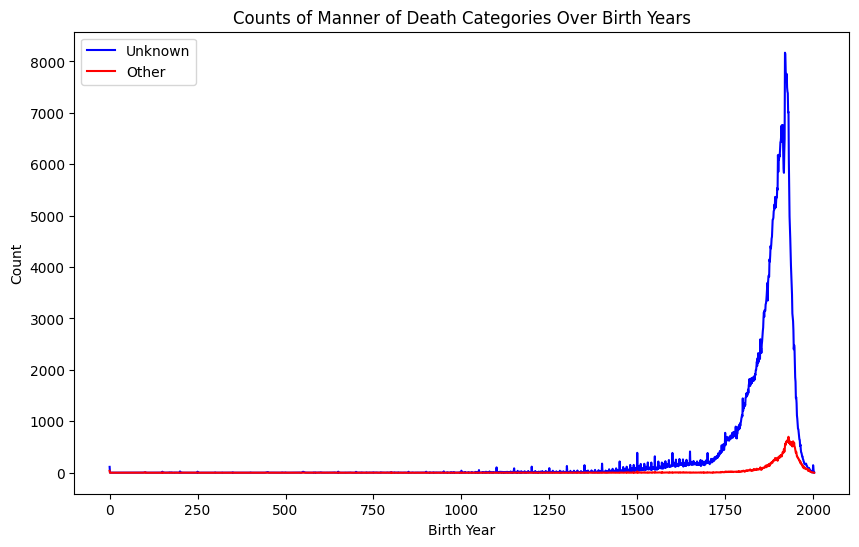

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Group by 'Birth year' and calculate the counts
grouped = df.groupby('Birth year')['Manner of death category'].value_counts().unstack(fill_value=0)

# Calculate 'Unknown' and 'Other' counts
grouped['Unknown'] = grouped['Unknown'] if 'Unknown' in grouped else 0
grouped['Other'] = grouped.sum(axis=1) - grouped['Unknown']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped['Unknown'], label='Unknown', color='blue')
plt.plot(grouped.index, grouped['Other'], label='Other', color='red')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.title('Counts of Manner of Death Categories Over Birth Years')
plt.legend()
plt.show()


In [ ]:
df[(df['Manner of death category'] == 'Unknown') & (df['Birth year'] < 1700)]

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Occupation category,Manner of death category,Geo,lng,lat
8,Q297,Diego Velázquez,Spanish painter,Male,Spain,Artist,1599,1660,Nan,61,Art,Unknown,"[-0.1, 39.77]",-0.10,39.77
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain,Artist,1541,1614,Nan,73,Art,Unknown,"[-6.09, 43.14]",-6.09,43.14
11,Q307,Galileo Galilei,"Italian mathematician, physicist, philosopher ...",Male,Italy,Astronomer,1564,1642,Nan,78,Science,Unknown,"[15.7, 41.66]",15.70,41.66
15,Q353,Blanche of Castile,"Spanish princess and saint, queen consort of F...",Female,Spain,Regent,1188,1252,Nan,64,Politics,Unknown,"[-4.21, 40.76]",-4.21,40.76
50,Q692,William Shakespeare,English playwright and poet,Male,United Kingdom,Playwright,1564,1616,Nan,52,Art,Unknown,"[-7.11, 54.66]",-7.11,54.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222574,Q76362891,Hans Solis,"Died before 26 December 1616. German, Painter,...",Male,Germany,Artist,1554,1608,Nan,54,Art,Unknown,"[8.31, 51.59]",8.31,51.59
1222752,Q76468990,François de Grille,French and Arles aristocrat from the late seve...,Male,France,Politician,1662,1741,Nan,79,Politics,Unknown,"[-2.27, 48.24]",-2.27,48.24
1222763,Q76499180,Anton Mayr,"Mayr, Anton; Jesuit theologian; 1673-1749",Male,Germany,Monk,1673,1749,Nan,76,Social,Unknown,"[11.9, 48.53]",11.90,48.53
1222824,Q76625167,Francisco de Segura,Spanish poet of the ''siglo de oro''.,Male,Spain,Artist,1569,1620,Nan,51,Art,Unknown,"[-6.71, 43.52]",-6.71,43.52


In [ ]:
df.groupby('Birth year')['Manner of death category'].apply(lambda x: x != 'Unknown')

<ipython-input-302-2b27f617a292>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('Birth year')['Manner of death category'].apply(lambda x: x != 'Unknown')


0           True
1           True
2           True
4          False
5           True
           ...  
1222992    False
1222993    False
1223000    False
1223007    False
1223008    False
Name: Manner of death category, Length: 721961, dtype: bool

In [ ]:
df.to_csv('AgeDataset-V3.csv', index=False)
df[~((df['Manner of death category'] == 'Unknown') & (df['Birth year'] > 1700))].to_csv('AgeDataset-V3-reduced-to-1700.csv', index=False)
df[(df['Manner of death category'] != 'Unknown') | df['Country'].isin(som)].to_csv('AgeDataset-V3-wo-unknown.csv', index=False)

In [ ]:
df.shape

(722034, 15)